# Generate Data for Robust Regressions
https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/

## Create a regression dataset with outliers

In [1]:
from random import random, randint, seed

from sklearn.datasets import make_regression

from matplotlib import pyplot

In [2]:
# Prepare the dataset
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1,
                           tail_strength=0.9, effective_rank=1,
                           n_informative=1, noise=3,
                           bias=50, random_state=1)
    # Add artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()

    return X, y

## Linear Regression

In [3]:
from numpy import arange, mean, std, absolute

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [4]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
    # Force scores to be positive
    return absolute(scores)

In [5]:
# Plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
    # Fit the model to all data
    model.fit(X, y)
    # Plot the dataset
    pyplot.scatter(X, y)
    # Plot the line of the best fit
    xaxis = arange(X.min(), X.max(), 0.01)
    yaxis = model.predict(xaxis.reshape((len(xaxis),1)))
    pyplot.plot(xaxis, yaxis, color='r')
    # Show the plot
    pyplot.title(type(model).__name__)
    pyplot.show()

In [6]:
# Generate dataset
X, y = get_dataset()

In [7]:
# Define model
model = LinearRegression()

In [8]:
# Evaluate model
results = evaluate_model(X, y, model)

In [9]:
print(f'Mean MAE: {mean(results)} ({std(results)})')

Mean MAE: 5.260342552122636 (1.1486679656152237)


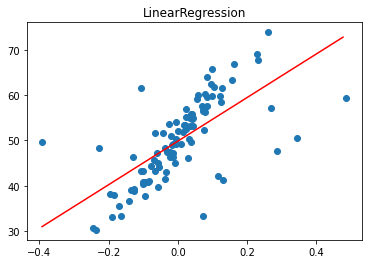

In [10]:
# Plot line of the best fit
plot_best_fit(X, y, model)